# MEMPOOL Prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import datetime
warnings.filterwarnings("ignore")
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [3]:
data = pd.read_csv(r"C:\Users\hp\Desktop\New folder\Python Object and Data Structure Basics\csv file\All Files\All Files\mempool.csv")
data.head(5)

,tx_id,fee,weight,parents
0,2e3da8fbc1eaca8ed9b7c2db9e6545d8ccac3c67deadee...,452,1620,NaN
1,79c51c9d4124c5cbb37a85263748dcf44e182dff83561f...,682,1136,6eb38fad135e38a93cb47a15a5f953cbc0563fd84bf1ab...
2,b0ef627c8dc2a706475d33d7712209ec779f7a8302aaea...,226,900,NaN
3,8c25f9be93990b96e8bc363778d6debee6867c7d73cefa...,258,1032,NaN
4,edc82751537be6afcb21c0229d8d20916d8e742a363ab2...,452,1616,NaN


In [4]:
data.columns

Index(['tx_id', 'fee', 'weight', 'parents '], dtype='object')

In [5]:
data.shape

(5214, 4)

In [6]:
data.size

20856

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5214 entries, 0 to 5213
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tx_id     5214 non-null   object
 1   fee       5214 non-null   int64 
 2   weight    5214 non-null   int64 
 3   parents   2000 non-null   object
dtypes: int64(2), object(2)
memory usage: 163.1+ KB


In [8]:
data.describe()

,fee,weight
count,5214.000000,5214.000000
mean,1435.671461,2000.690449
std,5687.415106,7013.491561
min,110.000000,440.000000
25%,336.000000,888.000000
50%,592.500000,1132.000000
75%,1008.000000,1136.000000
max,201700.000000,295164.000000


In [9]:
data.sort_values('tx_id', ascending=False)

,tx_id,fee,weight,parents
194,fff410035912d1be6f3032151ed5529110276c709d9b9a...,516,1032,NaN
3202,ffea7a0e8ed92ae7f981965cbe6cc6e3a4ab2a9860f4b2...,1057,1132,52017f691b532373c78118eeeea04d56e54da238f1e5c4...
906,ffd7ebe7c403c8b2cb3f009a7119a7b0a2d08f34aa7a88...,444,1132,25dc6644e9f2d3761ef5f1bd0967b2bab9117f4323344d...
3878,ffd4ac2c4cfd215b6b0621a0f2ca4a9f30b50030979245...,235,936,NaN
458,ffd3d5c470bb60b1484505528b160b4ff7b2553a908dcb...,119,444,NaN
...,...,...,...,...
1209,0020b1c90b878d22a07273d1b15c63805d8ed8112f3b69...,134,536,NaN
3095,001eea6dae0bd5568542be629f5748cac3b5b52b24f166...,441,1136,ea45213fcd2089bda8d3a903ca59ebb5ded08f71ae6491...
4869,00119544dd3825a752f8c8c121df4c8f7b63e68830ddcd...,372,664,9867c49df9c7c3798aad36353aa31640dcbad3dd310bb6...
869,000a9de3796bdfb987fb2ccb0f97e11a9dd8f3c70dab34...,301,1024,NaN


In [10]:
data.tx_id.unique()

array(['2e3da8fbc1eaca8ed9b7c2db9e6545d8ccac3c67deadee95db050e41c1eedfc0',
       '79c51c9d4124c5cbb37a85263748dcf44e182dff83561fa3087f0e9e43f41c33',
       'b0ef627c8dc2a706475d33d7712209ec779f7a8302aaeab86c64cf00316a3df8',
       ...,
       '88a8c7118ac82199523eb10670f49c8b7f5ac82d4049072c29f8ee7082d23f9a',
       '4c5b18c0870665958fc2a377e425b70f8d01f03395af722b949955248f42ff0b',
       '631dee801c00241fc61bccc56112cf7670ce7150f4c64235e1c2b888d99a7037'],
      dtype=object)

In [11]:
data.value_counts()

tx_id                                                             fee   weight  parents                                                         
00119544dd3825a752f8c8c121df4c8f7b63e68830ddcdaf92afd0b9c08bc645  372   664     9867c49df9c7c3798aad36353aa31640dcbad3dd310bb604fa2cff431657b80a    1
a6cff4c22851a12047a91d530924b6d3e927586f77d7bd16944a17653907d8a6  977   1132    b4f7b8e5ad15ecf8789ce165da23fc25803e672e19f49fb70ad6f4df27635838    1
a804a3a70c795740b35e40980ad74272ae58cb3f3b21a831353a241199feef7a  301   1136    6eb38cee77cd4177e92c812987d0cc94af5bf39fb781ff384be9f7398786a1e4    1
a7eda4ba9d0c391396281786a430f4708584d53ad819d68c49c8685a147a4067  1101  904     60c7a1e3aa28d7db5360fd9dc8baaa473e3dfc4072c0559d7190a0ca47f1fead    1
a7e5eb1e6bc4e628ae715d812c4f4e9a0ade9f24231b75e4efd7be13f36a09f1  855   1132    72211ae8d68d2c81f8abcb77ecfeac1ca8494ec6c4bf9f73c1a1e50501ea7287    1
                                                                                                         

In [12]:
data.isnull().sum()

tx_id          0
fee            0
weight         0
parents     3214
dtype: int64

In [13]:
data.dtypes

tx_id       object
fee          int64
weight       int64
parents     object
dtype: object

In [14]:
data.drop(columns= 'tx_id')

,fee,weight,parents
0,452,1620,NaN
1,682,1136,6eb38fad135e38a93cb47a15a5f953cbc0563fd84bf1ab...
2,226,900,NaN
3,258,1032,NaN
4,452,1616,NaN
...,...,...,...
5209,850,568,NaN
5210,1496,1488,NaN
5211,1121,900,33c7c7bcb1cc07743fc3240cac6af31e4d4a8f535cae71...
5212,862,576,NaN


In [15]:
data.drop(columns= 'fee')

,tx_id,weight,parents
0,2e3da8fbc1eaca8ed9b7c2db9e6545d8ccac3c67deadee...,1620,NaN
1,79c51c9d4124c5cbb37a85263748dcf44e182dff83561f...,1136,6eb38fad135e38a93cb47a15a5f953cbc0563fd84bf1ab...
2,b0ef627c8dc2a706475d33d7712209ec779f7a8302aaea...,900,NaN
3,8c25f9be93990b96e8bc363778d6debee6867c7d73cefa...,1032,NaN
4,edc82751537be6afcb21c0229d8d20916d8e742a363ab2...,1616,NaN
...,...,...,...
5209,e0b5d2fe598fccdd716df743323346da227dfc9d2a6c3e...,568,NaN
5210,e33973618a9774aeb85548368efeaddb206ef206717e72...,1488,NaN
5211,88a8c7118ac82199523eb10670f49c8b7f5ac82d404907...,900,33c7c7bcb1cc07743fc3240cac6af31e4d4a8f535cae71...
5212,4c5b18c0870665958fc2a377e425b70f8d01f03395af72...,576,NaN


In [16]:
data.shape

(5214, 4)

In [17]:
data.corr()

,fee,weight
fee,1.000000,0.320535
weight,0.320535,1.000000


# Exploratory Data Analysis

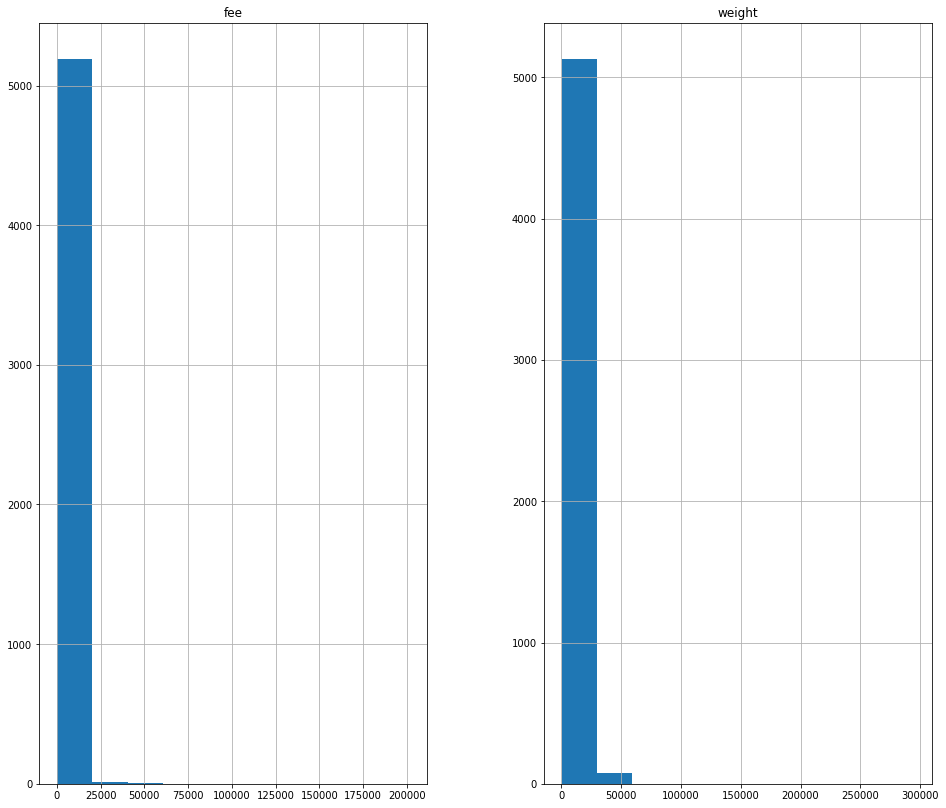

In [20]:
data.hist(figsize=(16,14))
plt.show()#histogram plot

<AxesSubplot:>

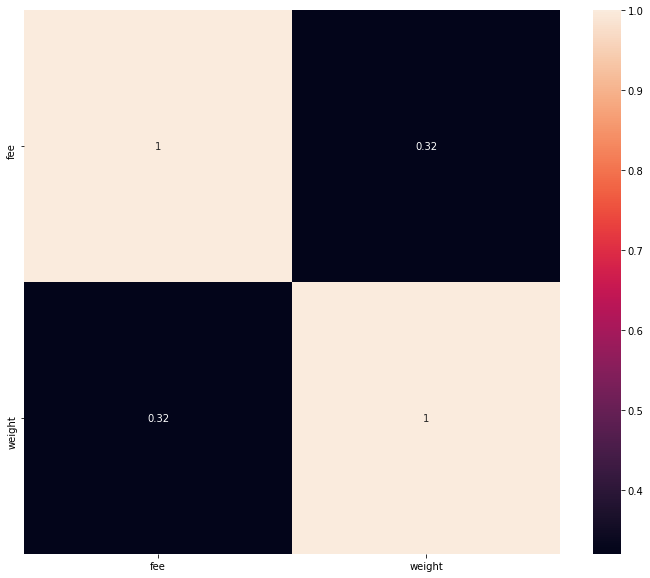

In [21]:
#HEATMAP

plt.figure(figsize=(12,10))

sns.heatmap(data.corr(), annot=True)

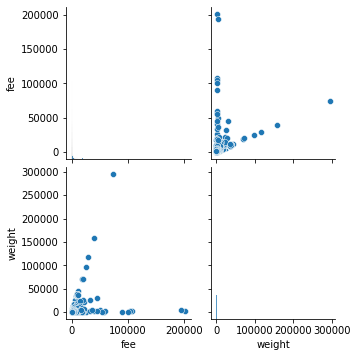

In [22]:
#Pairplot

sns.pairplot(data=data)

In [23]:
data.columns

Index(['tx_id', 'fee', 'weight', 'parents '], dtype='object')

<AxesSubplot:xlabel='fee'>

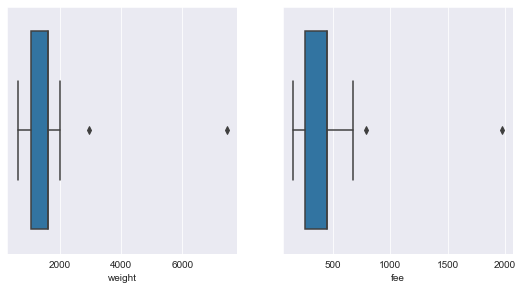

In [24]:
#Boxplot
plt.figure(figsize=(14,10))
sns.set_style(style='darkgrid')
plt.subplot(2,3,1)
sns.boxplot(x='weight', data=data[100:180])
plt.subplot(2,3,2)
sns.boxplot(x='fee', data=data[100:180])

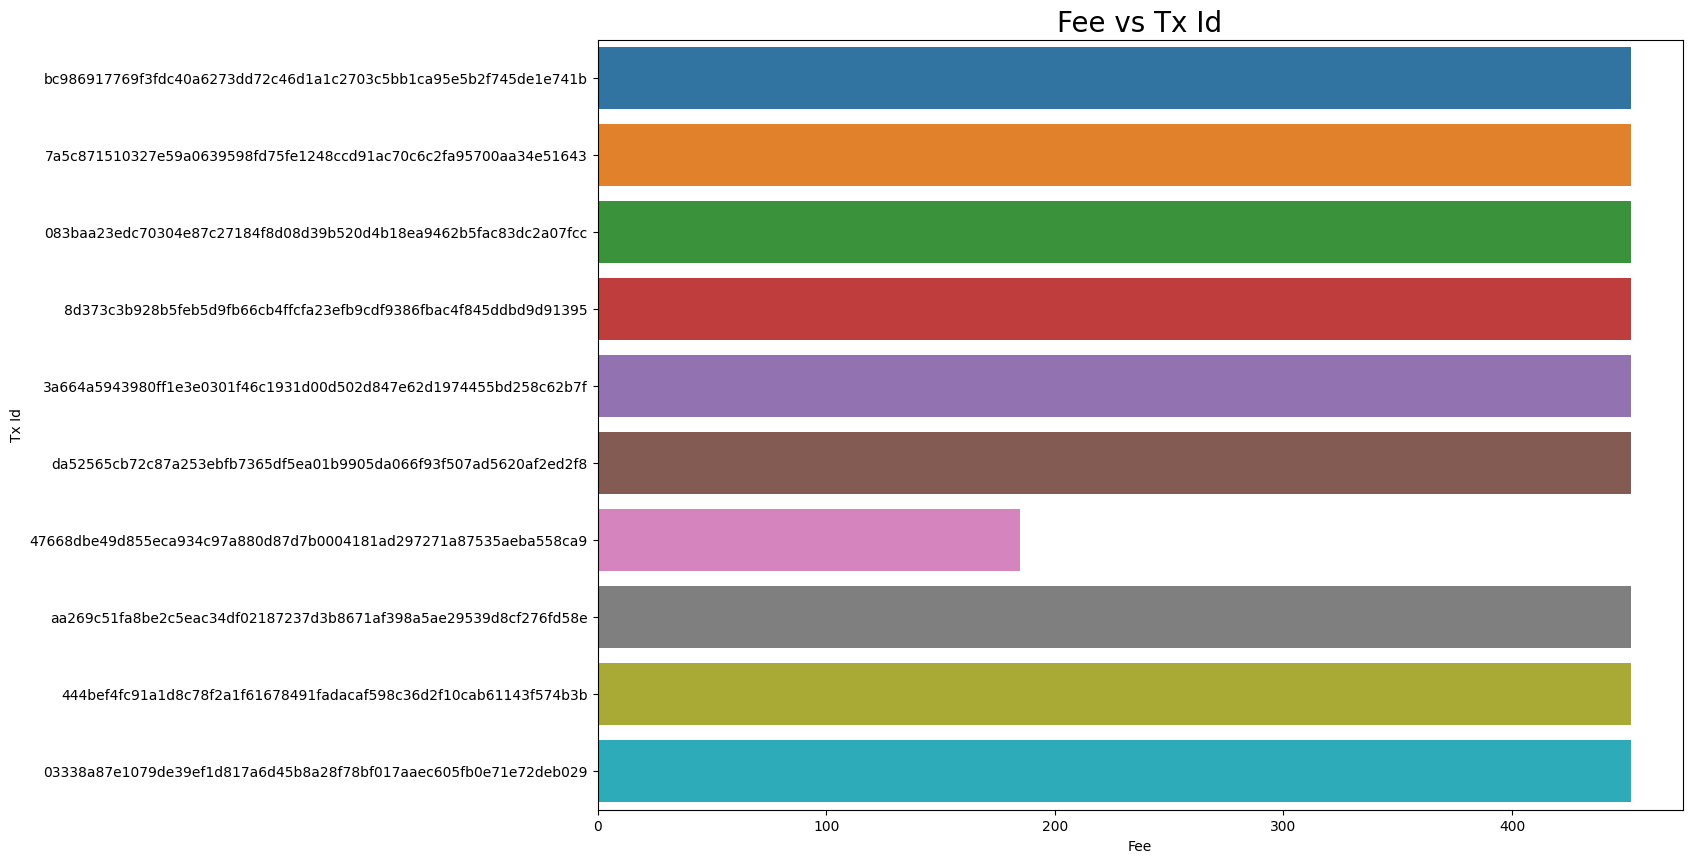

In [26]:
#Barplot
plt.style.use('default')
plt.figure(figsize=(14,10))
sns.barplot(x='fee', y='tx_id', data=data[170:180])
plt.title("Fee vs Tx Id", fontsize=20)
plt.xlabel('Fee')
plt.ylabel('Tx Id')
plt.show()

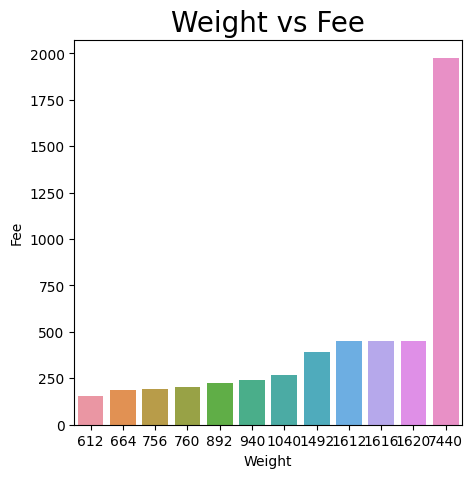

In [28]:
#Barplot
plt.style.use('default')
plt.figure(figsize=(5,5))
sns.barplot(x='weight', y='fee', data=data[150:180])
plt.title("Weight vs Fee", fontsize=20)
plt.xlabel('Weight')
plt.ylabel('Fee')
plt.show()

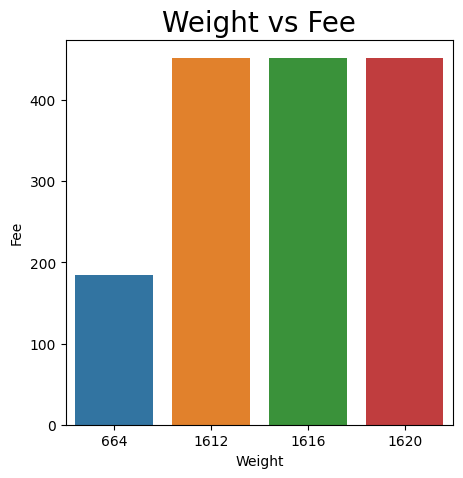

In [29]:
plt.style.use('default')
plt.figure(figsize=(5,5))
sns.barplot(x='weight', y='fee', data=data[170:180])
plt.title("Weight vs Fee", fontsize=20)
plt.xlabel('Weight')
plt.ylabel('Fee')
plt.show()

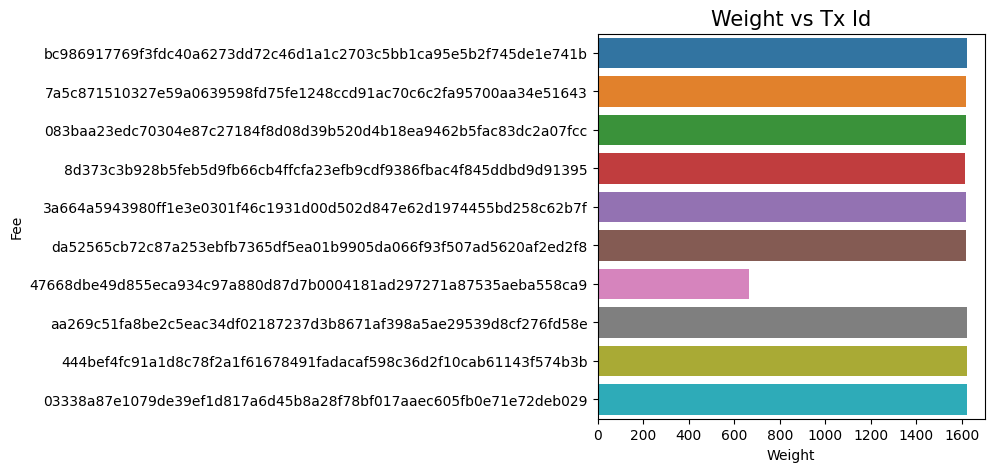

In [30]:
plt.style.use('default')
plt.figure(figsize=(5,5))
sns.barplot(x= 'weight', y='tx_id', data=data[170:180])
plt.title("Weight vs Tx Id", fontsize=15)
plt.xlabel('Weight')
plt.ylabel('Fee')
plt.show()

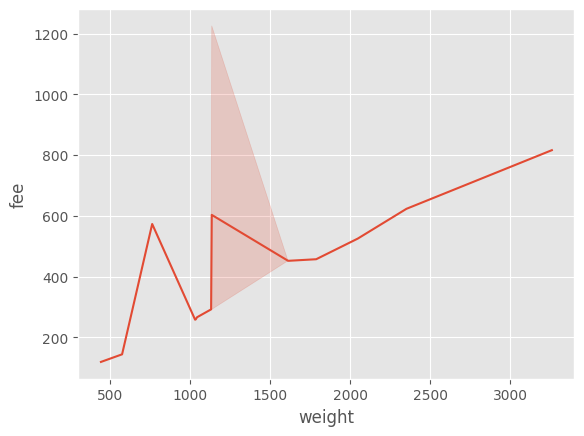

In [31]:
#LinePlot
plt.style.use('ggplot')
sns.lineplot(x='weight', y='fee', data=data[40:80])
plt.show()

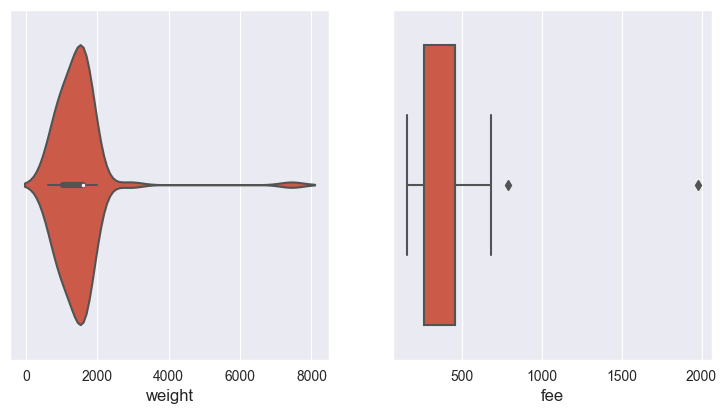

In [32]:
#Violine Plot
plt.figure(figsize=(14,10))
sns.set_style(style='darkgrid')
plt.subplot(2,3,1)
sns.violinplot(x='weight', data=data[100:180])
plt.subplot(2,3,2)
sns.boxplot(x='fee', data=data[100:180])
plt.show()

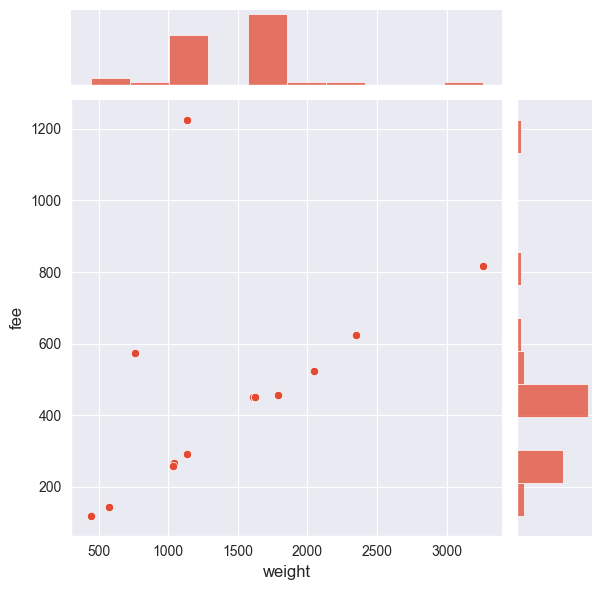

In [33]:
#JointPlot
sns.jointplot(x='weight', y='fee', data=data[40:80])

In [34]:
#Categorical Feature
list_1 = list(data.columns)

In [35]:
list_1

['tx_id', 'fee', 'weight', 'parents ']

In [36]:
list_cate = []
for i in list_1:
    if data[i].dtype=='object':
        list_cate.append(i)

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [39]:
for i in list_cate:
    data[i]=le.fit_transform(data[i])

In [40]:
data

,tx_id,fee,weight,parents
0,981,452,1620,1990
1,2509,682,1136,873
2,3620,226,900,1990
3,2891,258,1032,1990
4,4831,452,1616,1990
...,...,...,...,...
5209,4587,850,568,1990
5210,4634,1496,1488,1990
5211,2802,1121,900,433
5212,1604,862,576,1990


In [41]:
y = data['weight']
x= data.drop('weight', axis=1)

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0, test_size=0.2)

In [45]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

4171
1043
4171
1043


In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)


knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [47]:
y_pred= knn.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score of Model:\n", knn.score(x_train,y_train)*100)

Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy Score of Model:
 35.81874850155838


# * Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=123, criterion='entropy')

dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

In [50]:
y_pred= dtree.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Accuracy Score of Model:\n', dtree.score(x_train, y_train)*100)

Confusion Matrix:
 [[0 0 1 ... 0 0 0]
 [6 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy Score of Model:
 32.31838887556941


# * Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [53]:
y_pred= rfc.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("Accuracy Score of the Model:\n", rfc.score(x_train, y_train)*100)

Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [3 2 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy Score of the Model:
 100.0


# Bagging Classifier

In [54]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(x_train, y_train)
model.score(x_train,y_train)                          

0.967873411651882

# ExtraTreesClassifier

In [57]:
from sklearn.ensemble import ExtraTreesClassifier
etc= ExtraTreesClassifier(n_estimators = 100, random_state=0)
etc.fit(x_train, y_train)

ExtraTreesClassifier(random_state=0)

In [62]:
y_pred=etc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",etc.score(x_train,y_train)*100)

Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [2 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Training Score:
 100.0


In [63]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

,Actual,Predicted
1828,1136,664
4732,576,576
3895,1132,1136
1551,900,896
42,1032,1040
...,...,...
4993,576,896
1262,36524,36520
5192,904,904
3986,760,2672


* CONCLUSION :

ACCURACIES OF DIFFERENT MODELS ARE:

KNeighbors Classifier= 36 %

Decision Tree Classifier= 33 %

Random Forest Classifier= 100 %

Bagging Classifier = 39 %

Extra Trees Classifier= 100 %

We got a good accuracy of about 100 % using Random Forest Classifier and Extra Trees Classifier which is quite well for the given dataset.

The accuracy of other models can be increased further by HyperTuning.